In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

5.1 Effects of interpolatoin techniques in image resize

show grid

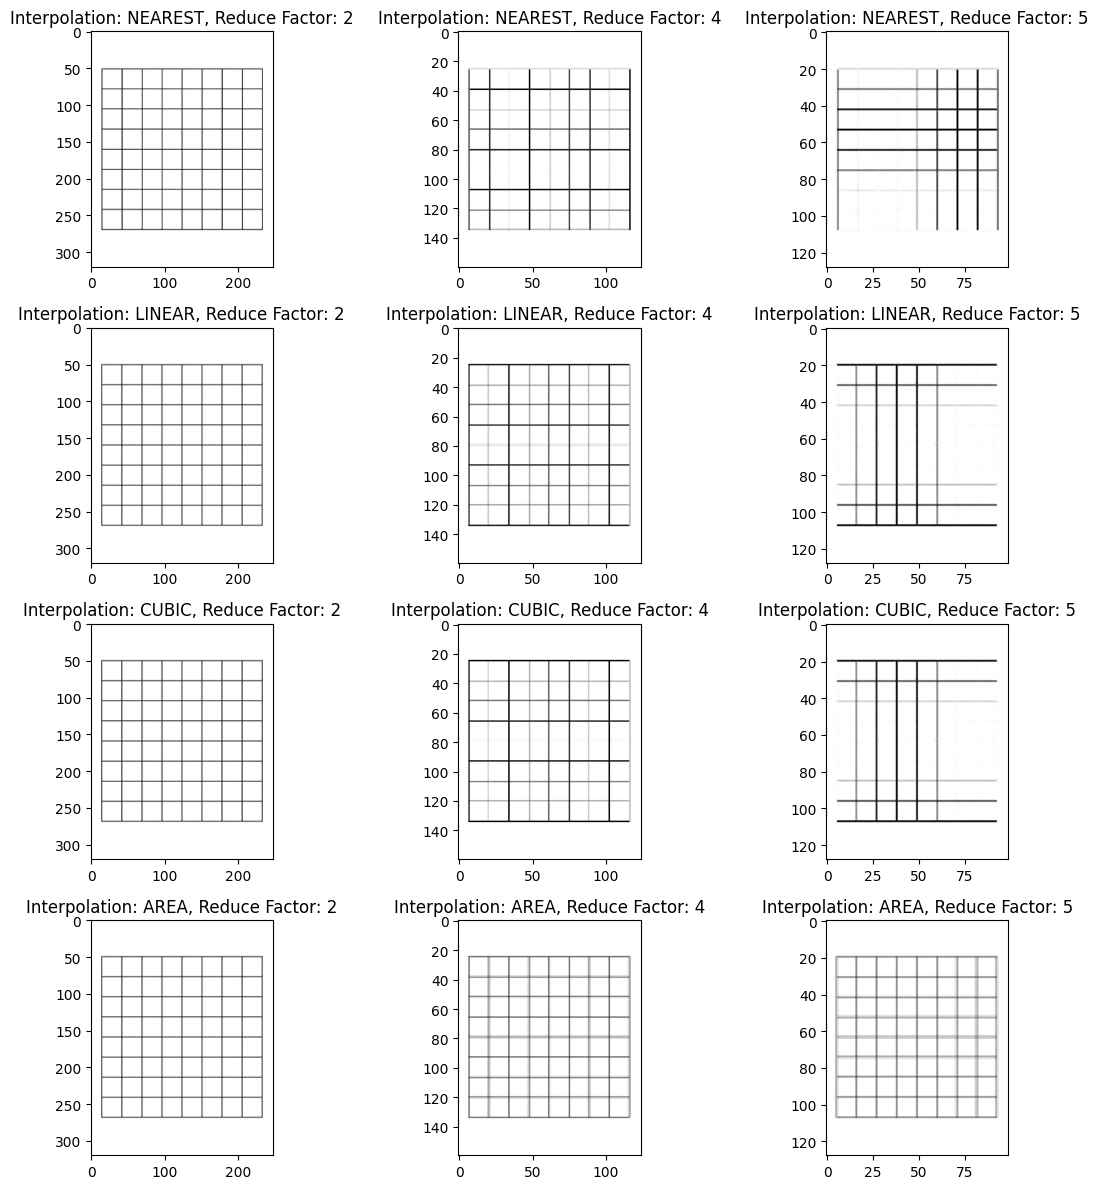

In [9]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("images/gridimage.jpg")
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
name_methods = ["NEAREST","LINEAR","CUBIC","AREA"]
reduce_factors = [2, 4, 5]
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, inter_method in enumerate(inter_methods):
    for j, reduce_factor in enumerate(reduce_factors):
        resized_image = cv2.resize(image, None, fx=1/reduce_factor, fy=1/reduce_factor, interpolation=inter_method)
        axes[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f'Interpolation: {name_methods[i]}, Reduce Factor: {reduce_factor}')
plt.tight_layout()
plt.show()


with real image 

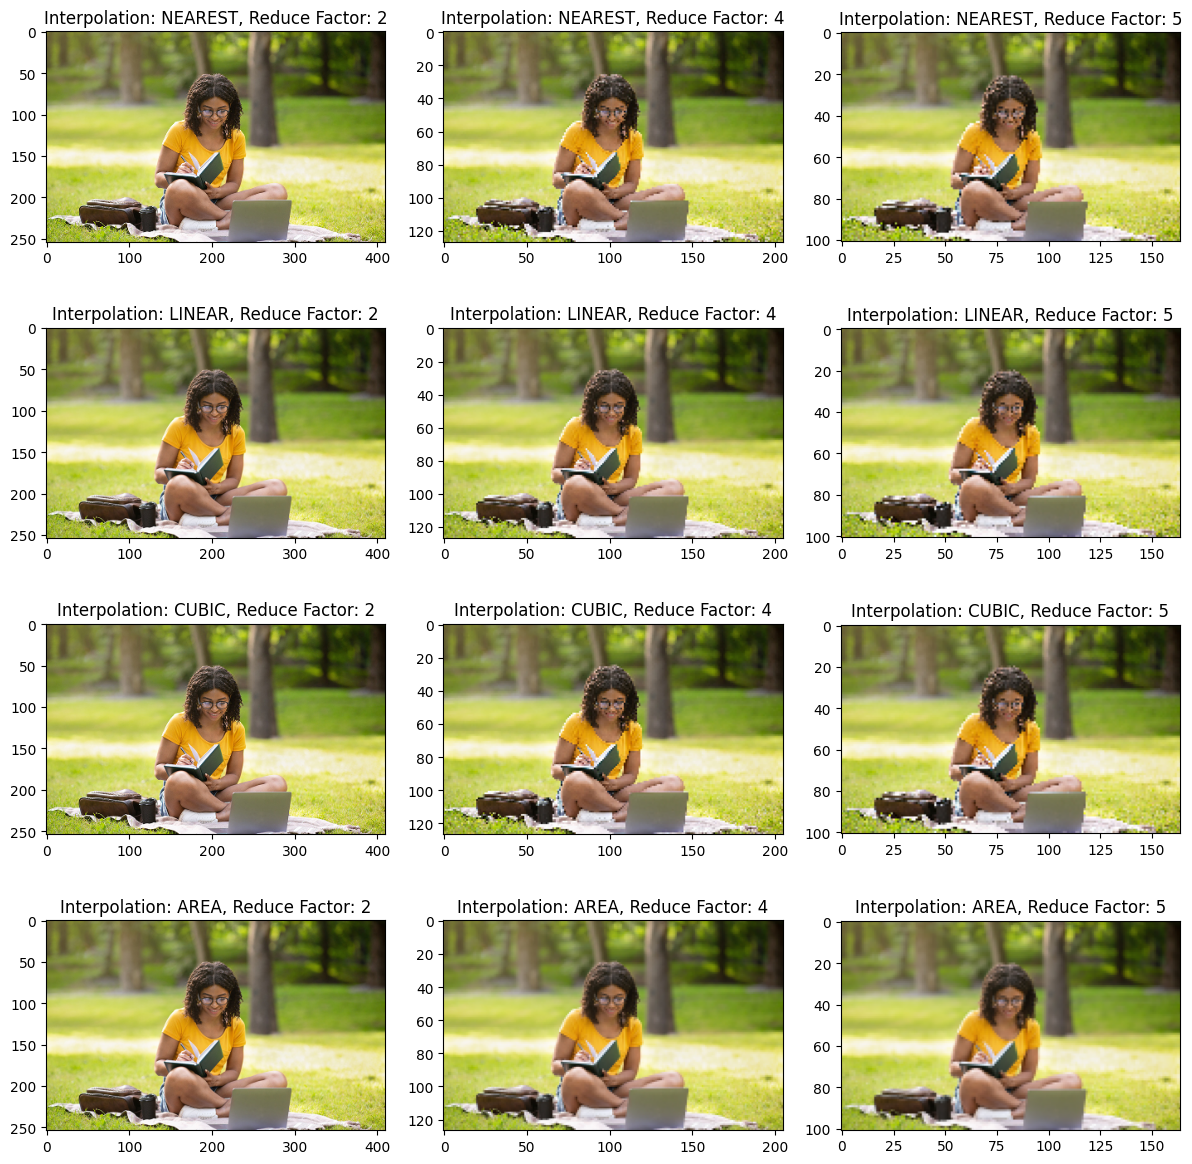

In [10]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("images/girl2.jpg")
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
name_methods = ["NEAREST","LINEAR","CUBIC","AREA"]
reduce_factors = [2, 4, 5]
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, inter_method in enumerate(inter_methods):
    for j, reduce_factor in enumerate(reduce_factors):
        resized_image = cv2.resize(image, None, fx=1/reduce_factor, fy=1/reduce_factor, interpolation=inter_method)
        axes[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f'Interpolation: {name_methods[i]}, Reduce Factor: {reduce_factor}')
plt.tight_layout()
plt.show()

5.2 IMAGE AUGMENTATION USING KERAS IMAGEDATAGENERATOR

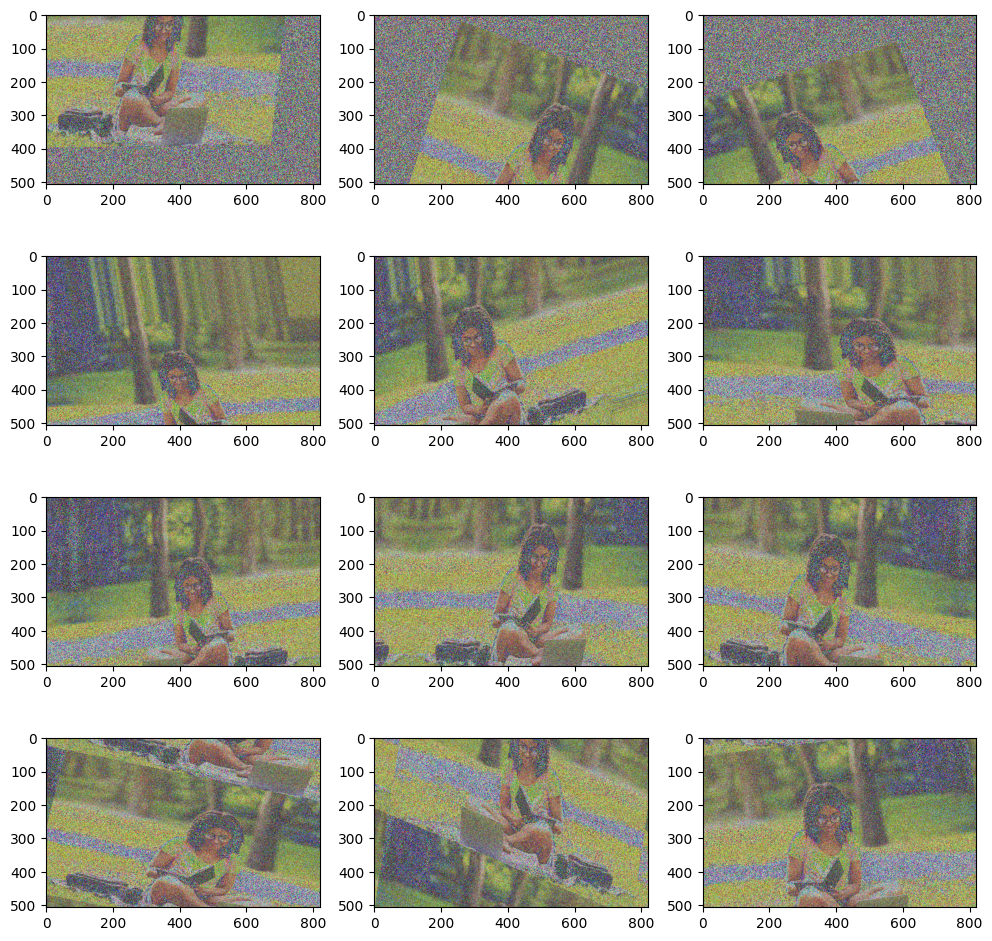

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Load the image
img = cv2.imread("images/girl2.jpg")
imgs = [img]
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
# Define the function to add Gaussian noise
def add_gaussian_noise(img):
    noise = np.random.normal(loc=0, scale=50, size=img.shape)
    noisy_img = img + noise
    return noisy_img

# List of fill methods
fill_methods = ['constant', 'nearest', 'reflect', 'wrap']

for i,fill_method in enumerate(fill_methods):
    # Create the ImageDataGenerator with specified augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=10,
        zoom_range=0.2,
        horizontal_flip=True,
        preprocessing_function=add_gaussian_noise,
        fill_mode=fill_method
    )
    imgs_array = np.array(imgs)
    augmented_images = datagen.flow(imgs_array, batch_size=1)
    for j in range(3):
        batch = augmented_images.next()
        im_result = batch[0].astype('uint8')
        axes[i, j].imshow(cv2.cvtColor(im_result,cv2.COLOR_BGR2RGB))
        


5.3 IMAGE AUGMENTATION AS TRAINING DATA FOR AUTOENCODER

In [2]:
(X_train,_),(X_test,_) = fashion_mnist.load_data()


 3604480/26421880 [===>..........................] - ETA: 2:26

KeyboardInterrupt: 